<a href="https://colab.research.google.com/github/srieesh20/Business-Case-study/blob/main/Video_Streaming_Platform_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 24.6MB/s]


In [ ]:
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print("Checking size of the data")

df.shape

Checking size of the data


(8807, 12)

**Data Information and data type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Above information helps us understand that almost all of the values are categorical except release year**

In [ ]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


From above data we can say

Since most of the values are categorical that is why they don't have any min,max or quantile values

Most frequent values of each columns can be seen on the row 'top'

Release year is the only numerical data, 1925 is when the oldest content was released.

By 2013, 25% of the content added
By 2017, 50% of the content added
By 2019, 75% of the content added

The biggest shift came between 2017 to 2019 as in 2 years more content was released whereas previously it this count came in from 4 years.

**Checking Unique values in each column**

In [ ]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

**Checking if any duplicate values**

In [ ]:
df.duplicated().sum()

0

***There are no duplicates***

**Checking missing values in each column**

In [ ]:
df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool

In [ ]:
duplicates=df.isna().sum().sum()
print(f"total missing values in the data are: {duplicates}")


total missing values in the data are: 4307


In [ ]:
print("Count of missing values in each column: ")
df.isna().sum().sort_values(ascending=False)

Count of missing values in each column: 


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

**So as we can see the 'director' columns is having most null values and followed by 'country' and 'cast'.**

**Comparison of TV show and movies**

In [ ]:
x_value=df['type'].value_counts().index
y_value=df['type'].value_counts().values

In [ ]:
x_value

Index(['Movie', 'TV Show'], dtype='object')

In [ ]:
y_value

array([6131, 2676])

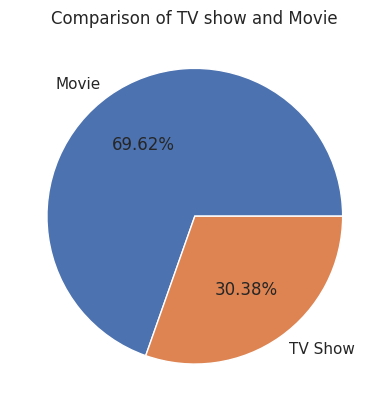

In [ ]:
plt.pie(y_value,labels=x_value,autopct='%1.2f%%')
plt.title('Comparison of TV show and Movie')
plt.show()

From above pie graph we can say that more content of movies are there than TV shows


**Movies Analysis**

In [ ]:
movies=df[df['type']=='Movie']
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [ ]:
print("checking for nan values")
movies['country'].isna().sum()

checking for nan values


440

In [ ]:
print("replacing nan values with unknown country and sorting the country with highest number of movie content")
top_movies=movies.country.fillna('Unknown').apply(lambda x:str(x).split(', ')).explode().value_counts(ascending=False).head(10)
top_movies

replacing nan values with unknown country and sorting the country with highest number of movie content


United States     2751
India              962
United Kingdom     532
Unknown            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Name: country, dtype: int64

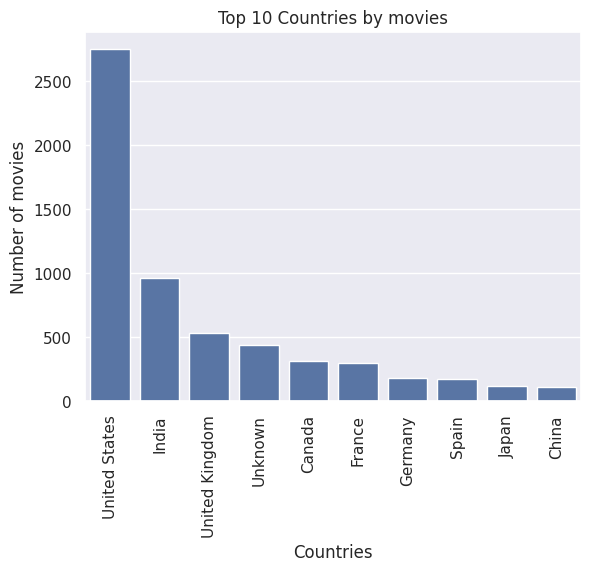

In [ ]:
sns.barplot(x=top_movies.index,y=top_movies.values)
plt.xlabel('Countries')
plt.ylabel('Number of movies')
plt.title('Top 10 Countries by movies')
plt.xticks(rotation=90)
plt.show()

**Movies duration analysis**

In [ ]:
movies['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [ ]:
movies['duration'].isna().sum()

3

Separating the 'min' from duration

In [ ]:
movies['duration']=pd.to_numeric(movies['duration'].str.replace(' min',''))
movies['duration']

<ipython-input-17-b261e032d905>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=pd.to_numeric(movies['duration'].str.replace(' min',''))


0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 6131, dtype: float64

Filling the nan values in duration using median value of movie duration and converting to int type

In [ ]:
median_duration=movies['duration'].median()
movies['duration']=movies['duration'].fillna(median_duration)
movies['duration']=movies['duration'].astype(int)

<ipython-input-18-3df5726123dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].fillna(median_duration)
<ipython-input-18-3df5726123dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].astype(int)


In [ ]:
movies['duration'].isna().sum()

0

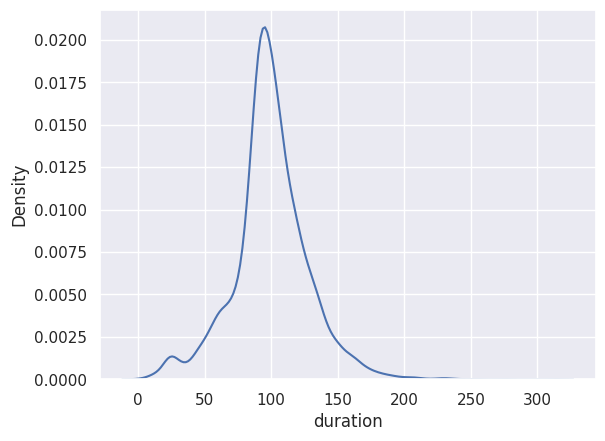

In [ ]:
sns.kdeplot(movies,x=movies['duration'])
plt.show()

From the above kdeplot we can say that highest range movies duration are ranging between 75-90 minutes

**TV Shows Analysis**

In [ ]:
tv_show=df[df['type']=='TV Show']
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [ ]:
tv_show['country'].fillna('Unknown Country',inplace=True)
tv_show['country'].isna().sum()

<ipython-input-22-a67afa208121>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['country'].fillna('Unknown Country',inplace=True)


0

In [ ]:
top10_tvshow=tv_show['country'].value_counts()[:10]
top10_tvshow

United States      760
Unknown Country    391
United Kingdom     213
Japan              169
South Korea        158
India               79
Taiwan              68
Canada              59
France              49
Australia           48
Name: country, dtype: int64

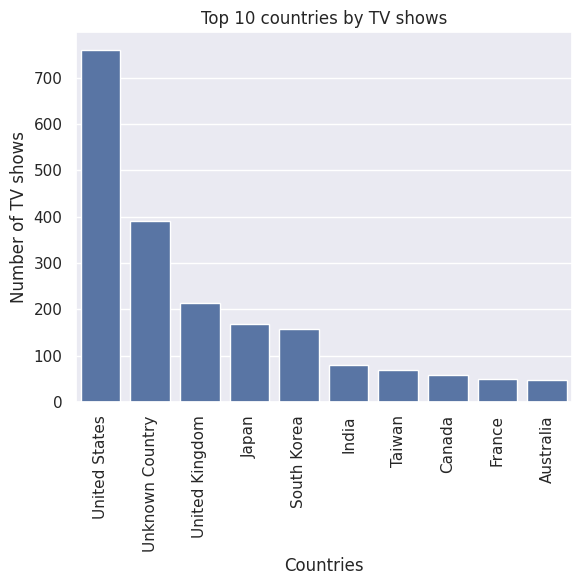

In [ ]:
sns.barplot(x=top10_tvshow.index,y=top10_tvshow.values)
plt.title('Top 10 countries by TV shows')
plt.xlabel('Countries')
plt.ylabel('Number of TV shows')
plt.xticks(rotation=90)
plt.show()

From the above graph:

United States was the top most country with highest number of TV shows

**TV show duration analysis**

In [ ]:
tv_show['duration']

1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
5        1 Season
          ...    
8795    2 Seasons
8796    2 Seasons
8797    3 Seasons
8800     1 Season
8803    2 Seasons
Name: duration, Length: 2676, dtype: object

In [ ]:
tv_show['duration'].isna().sum()

0

In [ ]:
tv_show['duration']=tv_show['duration'].str.replace(' Season','')
tv_show['duration']

<ipython-input-34-d8ba8b730683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['duration']=tv_show['duration'].str.replace(' Season','')


1       2s
2        1
3        1
4       2s
5        1
        ..
8795    2s
8796    2s
8797    3s
8800     1
8803    2s
Name: duration, Length: 2676, dtype: object

In [ ]:
tv_show['duration']=tv_show['duration'].str.replace('s','')
tv_show['duration']

<ipython-input-35-58590cac9be2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['duration']=tv_show['duration'].str.replace('s','')


1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2676, dtype: object

In [ ]:
tv_show['duration']=tv_show['duration'].astype(int)
tv_show['duration']

<ipython-input-36-aeb1e80a2168>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_show['duration']=tv_show['duration'].astype(int)


1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2676, dtype: int64

In [ ]:
top10_TVshow=tv_show.groupby('title')[['duration']].sum().sort_values(by=['duration'],ascending=False).head(10)
top10_TVshow

,duration
title,
Grey's Anatomy,17
NCIS,15
Supernatural,15
Red vs. Blue,13
Heartland,13
COMEDIANS of the world,13
Criminal Minds,12
Trailer Park Boys,12
Cheers,11


<ipython-input-59-0528c8e33b59>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top10_TVshow,x='title',y='duration',palette='muted')


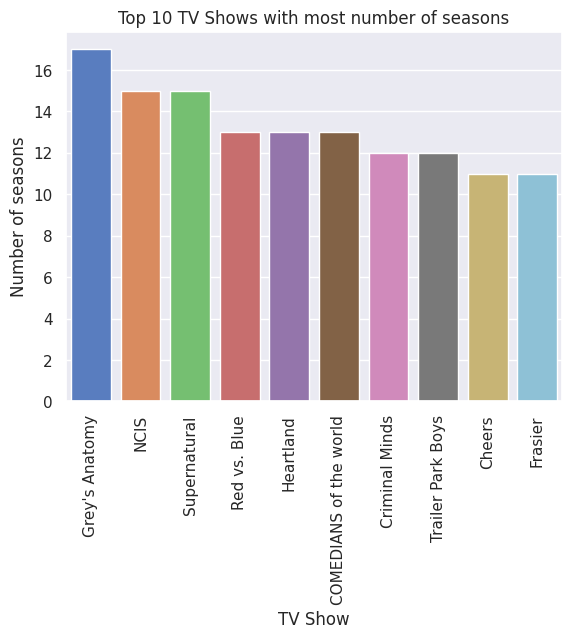

In [ ]:
sns.barplot(top10_TVshow,x='title',y='duration',palette='muted')
plt.title('Top 10 TV Shows with most number of seasons')
plt.xlabel('TV Show')
plt.ylabel('Number of seasons')
plt.xticks(rotation=90)
plt.show()

In [ ]:
tv_show['duration']

1       2
2       1
3       1
4       2
5       1
       ..
8795    2
8796    2
8797    3
8800    1
8803    2
Name: duration, Length: 2676, dtype: int64

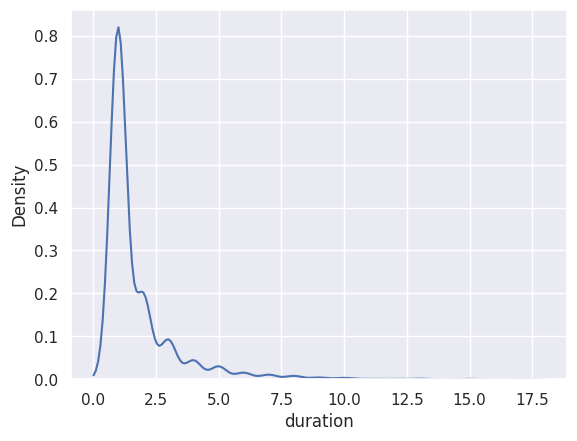

In [ ]:
sns.kdeplot(tv_show,x=tv_show['duration'])
plt.show()

From above graph we can notice that there more TV shows that are having only 1 season

**Actors analysis**

In [ ]:
print("Checking the values of the cast column")
df.cast.apply(lambda x: str(x).split(', ')).explode().value_counts()

Checking the values of the cast column


nan                        825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

**Dropping the NaN values to get cleaner data because of too many nan values data wont look good in the plot**

In [ ]:

cast_counts=df['cast'].dropna().apply(lambda x:x.split(', ')).explode().value_counts().head(10)
print("Top 10 actors with the most content:")
print(cast_counts)

Top 10 actors with the most content:
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64


Plotting the Top 10 cast from both TV shows and Movies


<ipython-input-57-f48c52c1a074>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cast_counts.index,y=cast_counts.values,palette='muted')


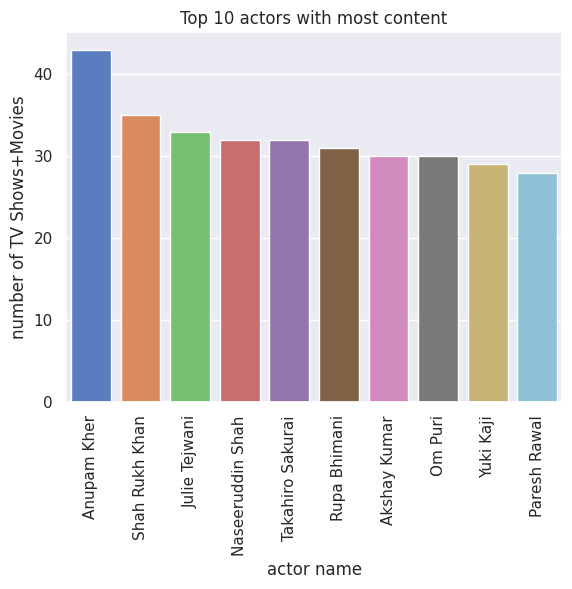

In [ ]:
print("Plotting the Top 10 cast from both TV shows and Movies")
sns.barplot(x=cast_counts.index,y=cast_counts.values,palette='muted')
plt.title('Top 10 actors with most content')
plt.xlabel('actor name')
plt.ylabel('number of TV Shows+Movies')
plt.xticks(rotation=90)
plt.show()

**Directors analysis**

In [ ]:
print("Checking values of directors")
df.director.apply(lambda x:str(x).split(', ')).explode().value_counts()


Checking values of directors


nan               2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: director, Length: 4994, dtype: int64

In [ ]:
print("dropping nan values of directors to get cleaner data")
top_directors = df['director'].dropna().apply(lambda x:x.split(', ')).explode().value_counts().head(10)
print("Top 10 directors with the most content:")
print(top_directors)

dropping nan values of directors to get cleaner data
Top 10 directors with the most content:
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64


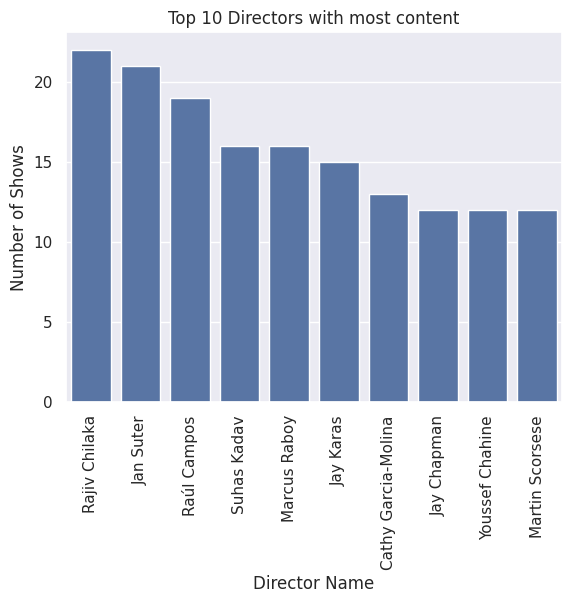

In [ ]:
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xlabel('Director Name')
plt.ylabel('Number of Shows')
plt.title('Top 10 Directors with most content')
plt.xticks(rotation=90)
plt.show()

**Genre Analysis**

In [ ]:
genre_counts = df['listed_in'].apply(lambda x: x.split(', ')).explode().value_counts().head(10)
genre_counts

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

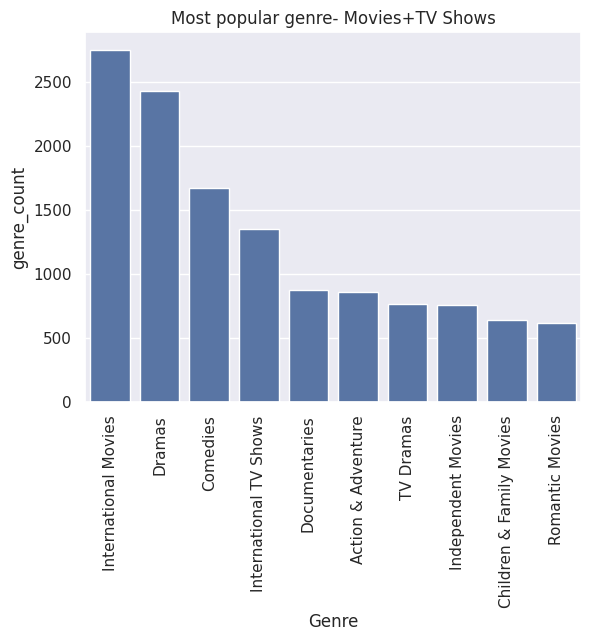

In [ ]:
sns.set(style='darkgrid')
sns.barplot(x=genre_counts.index,y=genre_counts.values)
plt.title('Most popular genre- Movies+TV Shows')
plt.xlabel('Genre')
plt.ylabel('genre_count')
plt.xticks(rotation=90)
plt.show()

From the above graph:

International movies genre has the highest number of genre contents

**Distribution Of Contents released over the years**

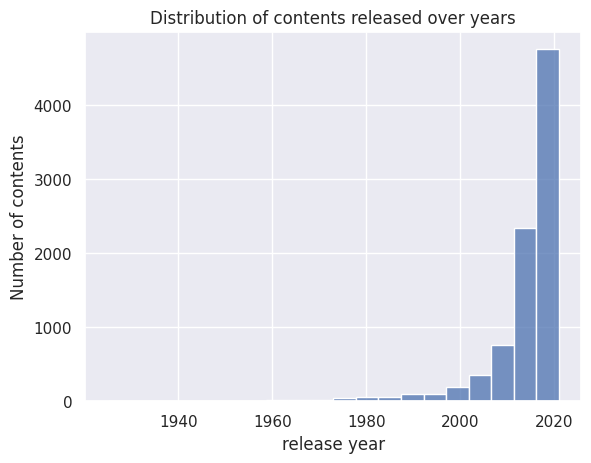

In [ ]:
sns.histplot(x=df['release_year'],bins=20)
plt.title('Distribution of contents released over years')
plt.xlabel('release year')
plt.ylabel('Number of contents')
plt.show()


From the above histogram plot we can see that:

We can see an uprise trend in  the contents released over netflix between 2008-2020

**Distribution of Ratings in TV shows and Movies**

In [ ]:
print("Total distribution of ratings")
df.groupby(by=['rating'])['title'].count().sort_values(ascending=False)

Total distribution of ratings


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: title, dtype: int64

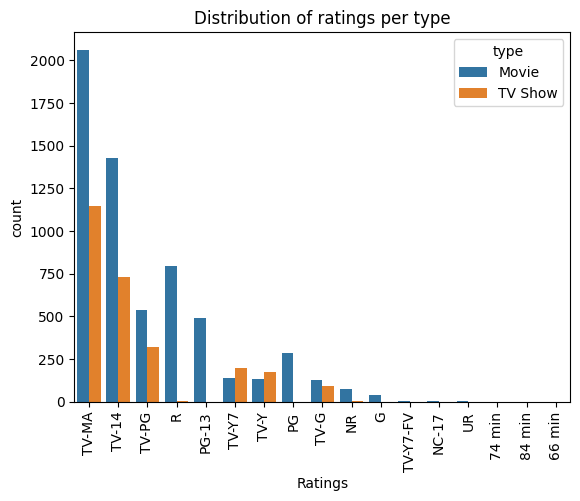

In [ ]:
sns.countplot(df,x='rating',order=df['rating'].value_counts().index,hue='type')
plt.title('Distribution of ratings per type')
plt.xlabel('Ratings')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()


From the above graph we can compare the ratings:

1. TV-MA,TV-14,TV-PG,R ratings movies were more than TV shows

**Converting Date added column to date type for better analysis**

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
df['date_added'].isna().sum()

10

In [ ]:
df['year_added']=df['date_added'].dt.year.fillna(-1)
df['year_added']

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: year_added, Length: 8807, dtype: float64

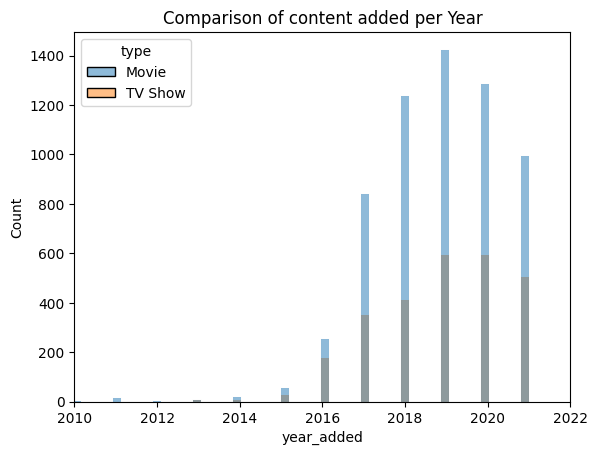

In [ ]:
sns.histplot(df,x='year_added',hue='type')
plt.title('Comparison of content added per Year')
plt.xlim(2010,2022)
plt.show()

Above Chart shows that :

1.Every year the movies added is more than the tv shows added

2.From year 2010 to 2019 there is a increase in the movies and tv shows added per year

3.From 2019 to 2020 the numbers for tv shows almost stays same but for movies it goes down


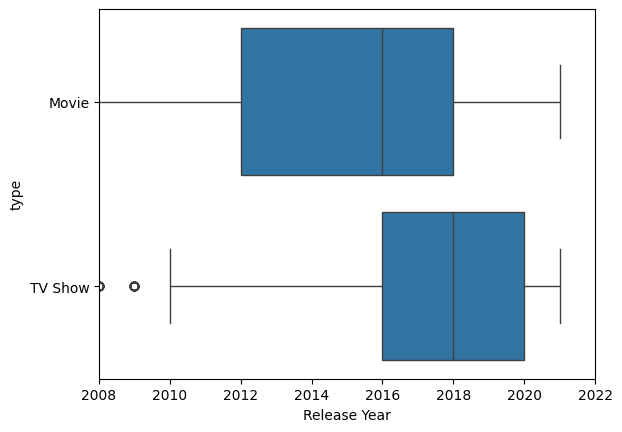

In [ ]:
sns.boxplot(df, x ='release_year' ,y='type')
plt.xlabel('Release Year')
plt.xlim(2008,2022)
plt.show()

Above Chart shows that -

1.Movies added is for longer duration than TV Shows

2.Mean value for movies added is 2016

3.Mean value for TV Series added is 2018

4.TV Shows added also have outlier before 2010

**Movies and TV Shows over the Years and Months**

For TV shows

In [ ]:
df['month_added'] = df['date_added'].dt.month.fillna(-1)
month_df = df[df['month_added']>0]
month_df = month_df[month_df['year_added']>0]
month_df = month_df[['type','year_added','month_added']]
month_df

,type,year_added,month_added
0,Movie,2021.0,9.0
1,TV Show,2021.0,9.0
2,TV Show,2021.0,9.0
3,TV Show,2021.0,9.0
4,TV Show,2021.0,9.0
...,...,...,...
8802,Movie,2019.0,11.0
8803,TV Show,2019.0,7.0
8804,Movie,2019.0,11.0
8805,Movie,2020.0,1.0


In [ ]:
tv_Shows_per_month = month_df[month_df['type']=='TV Show']
tv_Shows_per_month

,type,year_added,month_added
1,TV Show,2021.0,9.0
2,TV Show,2021.0,9.0
3,TV Show,2021.0,9.0
4,TV Show,2021.0,9.0
5,TV Show,2021.0,9.0
...,...,...,...
8795,TV Show,2018.0,5.0
8796,TV Show,2017.0,1.0
8797,TV Show,2018.0,9.0
8800,TV Show,2016.0,12.0


In [ ]:
movies_per_month = month_df[month_df['type']=='Movie']
movies_per_month

,type,year_added,month_added
0,Movie,2021.0,9.0
6,Movie,2021.0,9.0
7,Movie,2021.0,9.0
9,Movie,2021.0,9.0
12,Movie,2021.0,9.0
...,...,...,...
8801,Movie,2016.0,3.0
8802,Movie,2019.0,11.0
8804,Movie,2019.0,11.0
8805,Movie,2020.0,1.0


In [ ]:
new_tv_df = tv_Shows_per_month.groupby(['year_added','month_added'])['type'].count()
new_tv_df = pd.DataFrame(new_tv_df)
new_tv_df.reset_index(inplace = True)
new_tv_df = new_tv_df.pivot('month_added','year_added','type').fillna(0)
new_tv_df

<ipython-input-20-c74d22485ec3>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  new_tv_df = new_tv_df.pivot('month_added','year_added','type').fillna(0)


year_added,2008.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
month_added,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,28.0,14.0,24.0,37.0,53.0,36.0
2.0,1.0,0.0,1.0,1.0,6.0,17.0,24.0,45.0,42.0,44.0
3.0,0.0,1.0,0.0,2.0,3.0,38.0,35.0,53.0,44.0,37.0
4.0,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
5.0,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
6.0,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
7.0,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
8.0,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
9.0,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0


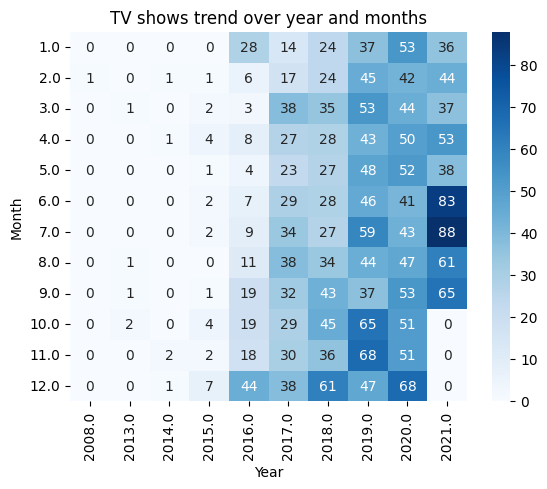

In [ ]:
sns.heatmap(new_tv_df,annot=True,cmap='Blues')
plt.title('TV shows trend over year and months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

From the above heat map we can tell

TV shows started appearing after 2014

In Year 2021 the most shows were added during the period of June and July

in year 2019 and 2020 the most tv shows added were in months Jan, Oct-Dec.

For movies

In [ ]:
new_movie_df = movies_per_month.groupby(['year_added','month_added'])['type'].count()
new_movie_df = pd.DataFrame(new_movie_df)
new_movie_df.reset_index(inplace = True)
new_movie_df = new_movie_df.pivot('month_added','year_added','type').fillna(0)
new_movie_df

<ipython-input-14-d12ebb1ede9e>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  new_movie_df = new_movie_df.pivot('month_added','year_added','type').fillna(0)


year_added,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
month_added,,,,,,,,,,,,,,
1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,58.0,105.0,116.0,152.0,96.0
2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,9.0,65.0,63.0,103.0,72.0,65.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,87.0,138.0,119.0,93.0,75.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,66.0,87.0,119.0,127.0,135.0
5.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,9.0,63.0,70.0,91.0,105.0,94.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,11.0,65.0,50.0,122.0,115.0,124.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,45.0,125.0,98.0,103.0,169.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,23.0,77.0,130.0,87.0,82.0,117.0
9.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,29.0,81.0,81.0,86.0,115.0,118.0


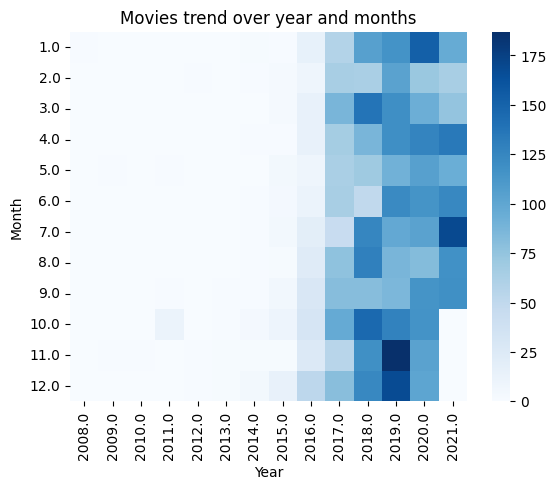

In [ ]:
sns.heatmap(new_movie_df,cmap='Blues')
plt.title('Movies trend over year and months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

From the above heat map we can tell:

1.Movies started appearing after 2014 with few added during year 2011

2.Movies are mostly added in months Jan, June, Nov, Dec over the years 2019, 2020, 2021

**Recommendation**
From the Above findings

1. Addition of more Movies and TV Shows than previous year, as there was a decline in 2019-2020

2. Adding more TV Shows during the min-year months like May, June, July will boost the TV Shows subscribers

3. Similarly for Movie adding them during the months of Nov, Dec, Jan will help in bringing more subscribers